<a href="https://colab.research.google.com/github/irutavias/healthcare/blob/main/Healthcare_Costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Loading and Verification:

In [ ]:
import pandas as pd

# Load data
geo_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY21_GEO.CSV', encoding='latin1')

prov_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY21_PRVSVC.CSV', encoding = 'latin1')

geo_data_19 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY19_GEO.CSV', encoding='latin1')

prov_data_19 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY19_PRVSVC.CSV', encoding = 'latin1')

geo_data_20 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY20_GEO.CSV', encoding = 'latin1')

prov_data_20 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY20_PRVSVC.CSV', encoding = 'latin1')

# Display the first few rows of each dataframe to verify the data
print(geo_data_21.head())
print(prov_data_21.head())
print(geo_data_19.head())
print(prov_data_19.head())
print(geo_data_20.head())
print(prov_data_20.head())


  Rndrng_Prvdr_Geo_Lvl  Rndrng_Prvdr_Geo_Cd Rndrng_Prvdr_Geo_Desc  DRG_Cd  \
0             National                  NaN              National       1   
1             National                  NaN              National       2   
2             National                  NaN              National       3   
3             National                  NaN              National       4   
4             National                  NaN              National       5   

                                            DRG_Desc  Tot_Dschrgs  \
0  HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...         1820   
1  HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...           62   
2  ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...        12404   
3  TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...        14906   
4  LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...         1179   

   Avg_Submtd_Cvrd_Chrg  Avg_Tot_Pymt_Amt  Avg_Mdcr_Pymt_Amt  
0          1.310561e+06      324827.19670       280854.3192

Data Processing and Visualization:


<ipython-input-8-1314cf4c4b9b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='Rndrng_Prvdr_Geo_Desc', data=state_payments_21, palette='YlGnBu')


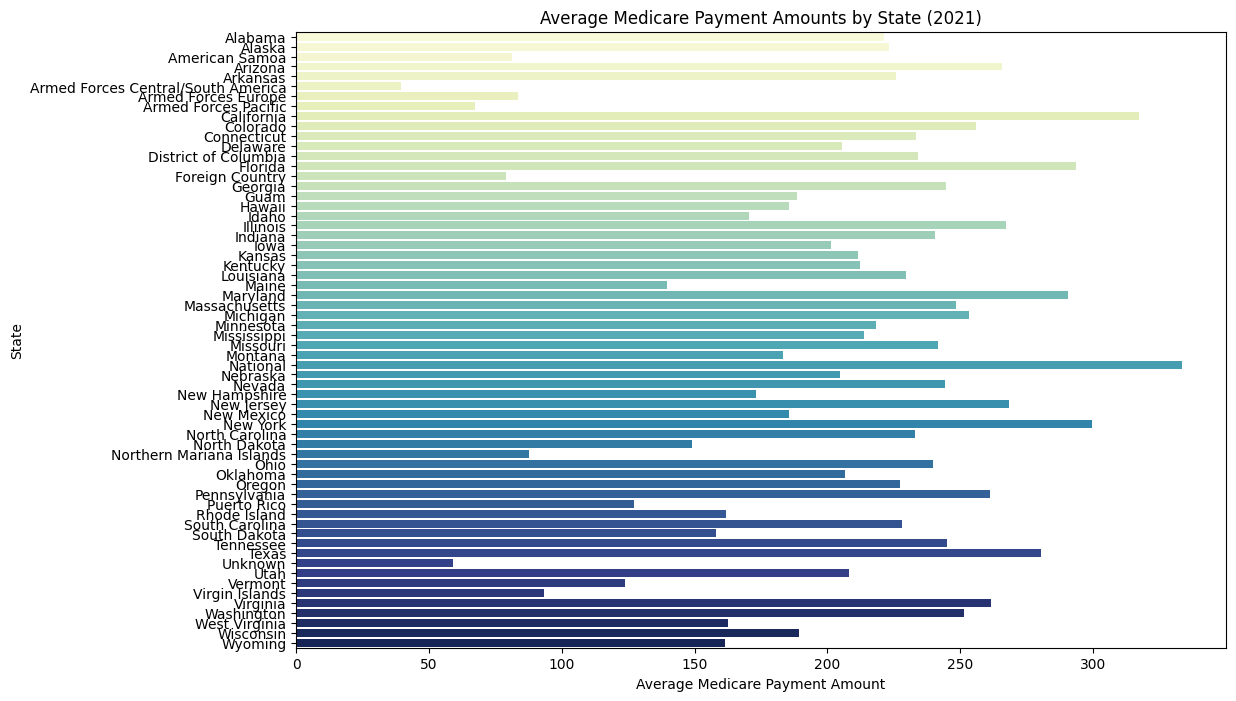

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by state for the year 2021
state_payments_21 = geo_data_21.groupby('Rndrng_Prvdr_Geo_Desc')['Avg_Mdcr_Pymt_Amt'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='Rndrng_Prvdr_Geo_Desc', data=state_payments_21, palette='YlGnBu')
plt.title('Average Medicare Payment Amounts by State (2021)')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel('State')
plt.show()


<ipython-input-10-fb565e8a0250>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Count', data=provider_distribution_21, palette='magma')


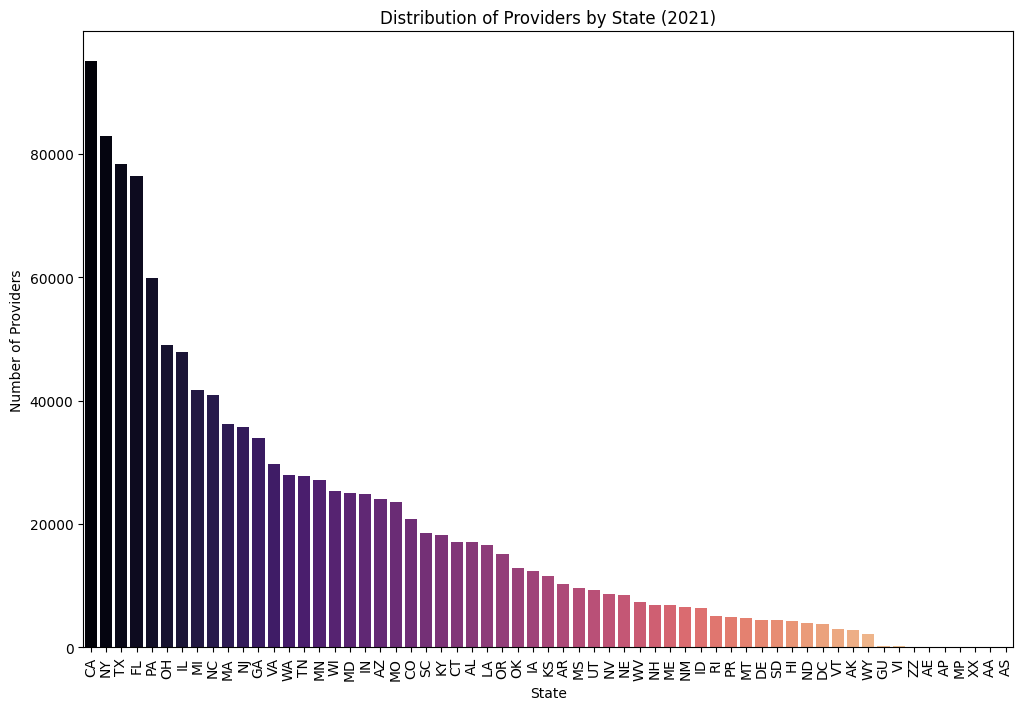

In [ ]:
import scipy.stats as stats

# Statistical analysis on average Medicare payment amounts by state
state_payment_stats = geo_data_21.groupby('Rndrng_Prvdr_Geo_Desc')['Avg_Mdcr_Pymt_Amt'].agg(['mean', 'std', 'count'])
state_payment_stats['sem'] = state_payment_stats['std'] / state_payment_stats['count'] ** 0.5

# Identify states with significantly higher or lower payments
mean_payment = state_payment_stats['mean'].mean()
std_payment = state_payment_stats['mean'].std()

high_payment_states = state_payment_stats[state_payment_stats['mean'] > mean_payment + std_payment]
low_payment_states = state_payment_stats[state_payment_stats['mean'] < mean_payment - std_payment]

print("States with significantly higher average Medicare payments:")
print(high_payment_states)

print("\nStates with significantly lower average Medicare payments:")
print(low_payment_states)


States with significantly higher average Medicare payments:
                             mean         std  count        sem
Rndrng_Prvdr_Geo_Desc                                          
California             317.278458  710.486064   9003   7.487933
Florida                293.436699  697.499777   8413   7.604464
Maryland               290.662873  788.339023   6001  10.176565
National               333.321047  669.187763  13282   5.806524
New York               299.385368  700.894414   7774   7.949326
Texas                  280.482001  667.456065   8202   7.369920

States with significantly lower average Medicare payments:
                                          mean         std  count        sem
Rndrng_Prvdr_Geo_Desc                                                       
American Samoa                       81.460217   35.587242      3  20.546304
Armed Forces Central/South America   39.634567   33.259840    141   2.800984
Armed Forces Europe                  83.710838  148.141502  

In [ ]:
# Inspect the column with specialty information
print(prov_data_21['Rndrng_Prvdr_Type'].unique())

['Internal Medicine' 'Pathology' 'Anesthesiology'
 'Obstetrics & Gynecology' 'General Surgery' 'Urology' 'Cardiac Surgery'
 'Nurse Practitioner' 'Physician Assistant'
 'Licensed Clinical Social Worker'
 'Physical Therapist in Private Practice' 'Family Practice' 'Cardiology'
 'Certified Registered Nurse Anesthetist (CRNA)' 'Optometry'
 'Mass Immunizer Roster Biller' 'Pain Management'
 'Physical Medicine and Rehabilitation' 'Radiation Oncology'
 'Infectious Disease' 'Orthopedic Surgery' 'Endocrinology' 'Chiropractic'
 'Diagnostic Radiology' 'Centralized Flu' 'Rheumatology' 'Neurology'
 'Emergency Medicine' 'Dermatology' 'Nephrology' 'Ophthalmology'
 'Pulmonary Disease' 'Pharmacy' 'Otolaryngology' 'Psychologist, Clinical'
 'General Practice' 'Ambulance Service Provider'
 'Plastic and Reconstructive Surgery' 'Psychiatry'
 'Interventional Cardiology' 'Gastroenterology' 'Hospitalist'
 'Audiologist' 'Geriatric Medicine'
 'Occupational Therapist in Private Practice' 'Neurosurgery'
 'Critical C

In [ ]:
import pandas as pd

# Load data
geo_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_PHY_R23_P05_V10_D21_Geo.csv', encoding='latin1')
prov_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_PHY_R23_P05_V10_D21_Prov.csv', encoding='latin1')

# Inspect column names
print("geo_data_21 columns:")
print(geo_data_21.columns)

print("\nprov_data_21 columns:")
print(prov_data_21.columns)

# Check for common columns
common_columns = set(geo_data_21.columns).intersection(set(prov_data_21.columns))
print("\nCommon columns between geo_data_21 and prov_data_21:")
print(common_columns)



<ipython-input-31-3137b19bef98>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  geo_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_PHY_R23_P05_V10_D21_Geo.csv', encoding='latin1')
<ipython-input-31-3137b19bef98>:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  prov_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_PHY_R23_P05_V10_D21_Prov.csv', encoding='latin1')


geo_data_21 columns:
Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Cd', 'Rndrng_Prvdr_Geo_Desc',
       'HCPCS_Cd', 'HCPCS_Desc', 'HCPCS_Drug_Ind', 'Place_Of_Srvc',
       'Tot_Rndrng_Prvdrs', 'Tot_Benes', 'Tot_Srvcs', 'Tot_Bene_Day_Srvcs',
       'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt',
       'Avg_Mdcr_Stdzd_Amt'],
      dtype='object')

prov_data_21 columns:
Index(['Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name',
       'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Gndr',
       'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2',
       'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn',
       'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type',
       'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Tot_HCPCS_Cds', 'Tot_Benes',
       'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt',
       'Tot_Mdcr_Pymt_Amt', 'Tot_Mdcr_Stdzd_Amt', 'Drug

<ipython-input-25-c768c357582b>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Year', y='Avg_Mdcr_Pymt_Amt', data=yearly_payments, marker='o', palette='muted')


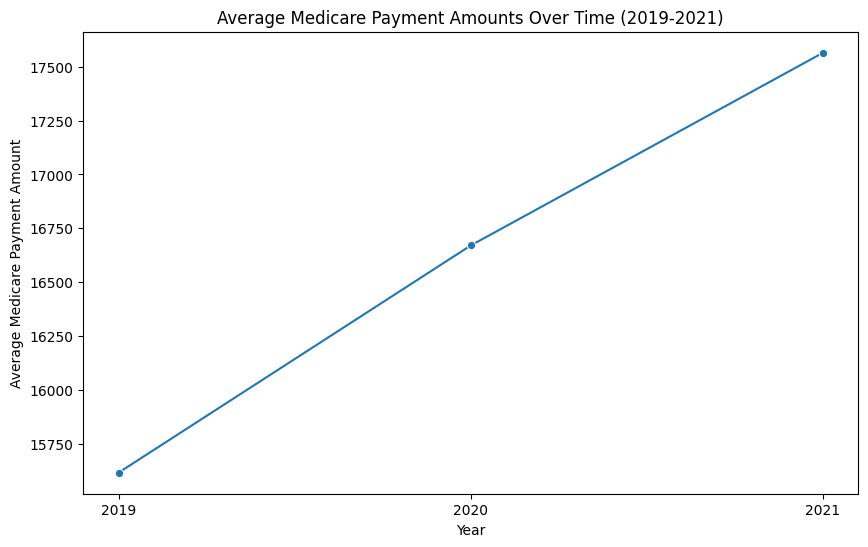

In [ ]:
# Load and combine data
geo_data_combined = pd.concat([geo_data_21, geo_data_20, geo_data_19], keys=['2021', '2020', '2019']).reset_index(level=0).rename(columns={'level_0': 'Year'})

# Aggregate data by year
yearly_payments = geo_data_combined.groupby('Year')['Avg_Mdcr_Pymt_Amt'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Avg_Mdcr_Pymt_Amt', data=yearly_payments, marker='o', palette='muted')
plt.title('Average Medicare Payment Amounts Over Time (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Average Medicare Payment Amount')
plt.show()


<ipython-input-2-a4e2d76e7840>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='Rndrng_Prvdr_Geo_Desc', data=state_payments_21, palette='YlGnBu')


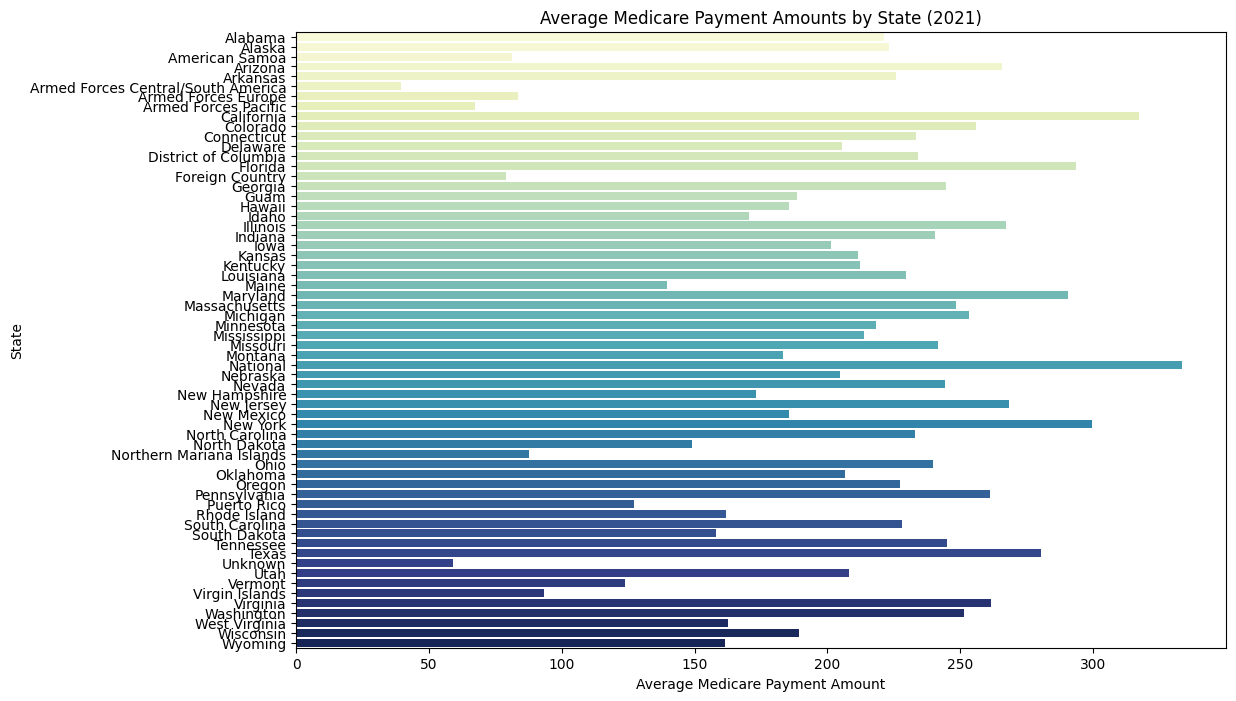

,Rndrng_Prvdr_Geo_Desc,Avg_Mdcr_Pymt_Amt
0,Alabama,221.170332
1,Alaska,223.195515
2,American Samoa,81.460217
3,Arizona,265.674029
4,Arkansas,225.739402
...,...,...
57,Virginia,261.548961
58,Washington,251.200002
59,West Virginia,162.614379
60,Wisconsin,189.220494


In [ ]:
# Aggregate data by state for the year 2021
state_payments_21 = geo_data_21.groupby('Rndrng_Prvdr_Geo_Desc')['Avg_Mdcr_Pymt_Amt'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='Rndrng_Prvdr_Geo_Desc', data=state_payments_21, palette='YlGnBu')
plt.title('Average Medicare Payment Amounts by State (2021)')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel('State')
plt.show()

# Display the state payments
state_payments_21


<ipython-input-4-9889fa9b749d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Count', data=provider_distribution_21, palette='magma')


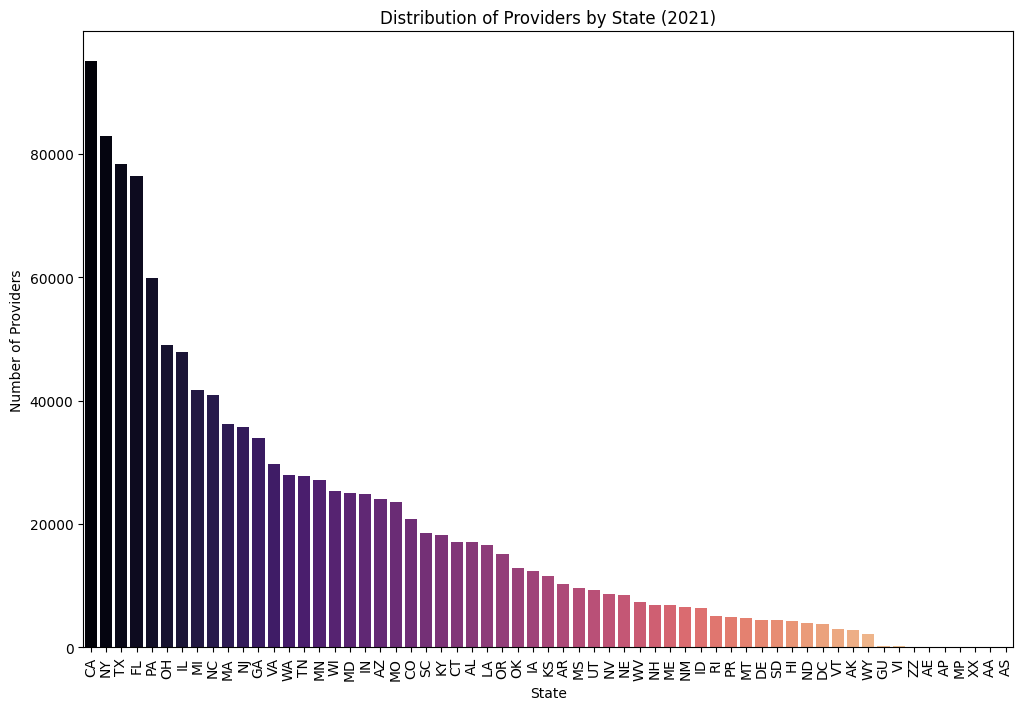

,State,Count
0,CA,95079
1,NY,82825
2,TX,78353
3,FL,76464
4,PA,59819
...,...,...
56,AP,41
57,MP,33
58,XX,31
59,AA,13


In [ ]:
# Aggregate data for provider distribution by state
provider_distribution_21 = prov_data_21['Rndrng_Prvdr_State_Abrvtn'].value_counts().reset_index()
provider_distribution_21.columns = ['State', 'Count']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Count', data=provider_distribution_21, palette='magma')
plt.title('Distribution of Providers by State (2021)')
plt.xlabel('State')
plt.ylabel('Number of Providers')
plt.xticks(rotation=90)
plt.show()

# Display the provider distribution
provider_distribution_21


In [ ]:
import scipy.stats as stats

# Statistical analysis on average Medicare payment amounts by state
state_payment_stats = geo_data_21.groupby('Rndrng_Prvdr_Geo_Desc')['Avg_Mdcr_Pymt_Amt'].agg(['mean', 'std', 'count'])
state_payment_stats['sem'] = state_payment_stats['std'] / state_payment_stats['count'] ** 0.5

# Identify states with significantly higher or lower payments
mean_payment = state_payment_stats['mean'].mean()
std_payment = state_payment_stats['mean'].std()

high_payment_states = state_payment_stats[state_payment_stats['mean'] > mean_payment + std_payment]
low_payment_states = state_payment_stats[state_payment_stats['mean'] < mean_payment - std_payment]

print("States with significantly higher average Medicare payments:")
print(high_payment_states)

print("\nStates with significantly lower average Medicare payments:")
print(low_payment_states)


States with significantly higher average Medicare payments:
                             mean         std  count        sem
Rndrng_Prvdr_Geo_Desc                                          
California             317.278458  710.486064   9003   7.487933
Florida                293.436699  697.499777   8413   7.604464
Maryland               290.662873  788.339023   6001  10.176565
National               333.321047  669.187763  13282   5.806524
New York               299.385368  700.894414   7774   7.949326
Texas                  280.482001  667.456065   8202   7.369920

States with significantly lower average Medicare payments:
                                          mean         std  count        sem
Rndrng_Prvdr_Geo_Desc                                                       
American Samoa                       81.460217   35.587242      3  20.546304
Armed Forces Central/South America   39.634567   33.259840    141   2.800984
Armed Forces Europe                  83.710838  148.141502  

In [ ]:
# Identify top DRGs by total payment amount in 2021
top_drgs_20 = geo_data_20.groupby('DRG_Cd')['Avg_Mdcr_Pymt_Amt'].sum().reset_index().sort_values(by='Avg_Mdcr_Pymt_Amt', ascending=False).head(10)

# Display the top DRGs
print(top_drgs_20)


     DRG_Cd  Avg_Mdcr_Pymt_Amt
0         1       8.396400e+06
2         3       7.677455e+06
3         4       4.732032e+06
173     215       4.140347e+06
12       14       3.586508e+06
174     216       3.582761e+06
13       16       3.408673e+06
366     453       3.188073e+06
17       20       3.092294e+06
177     219       3.055783e+06


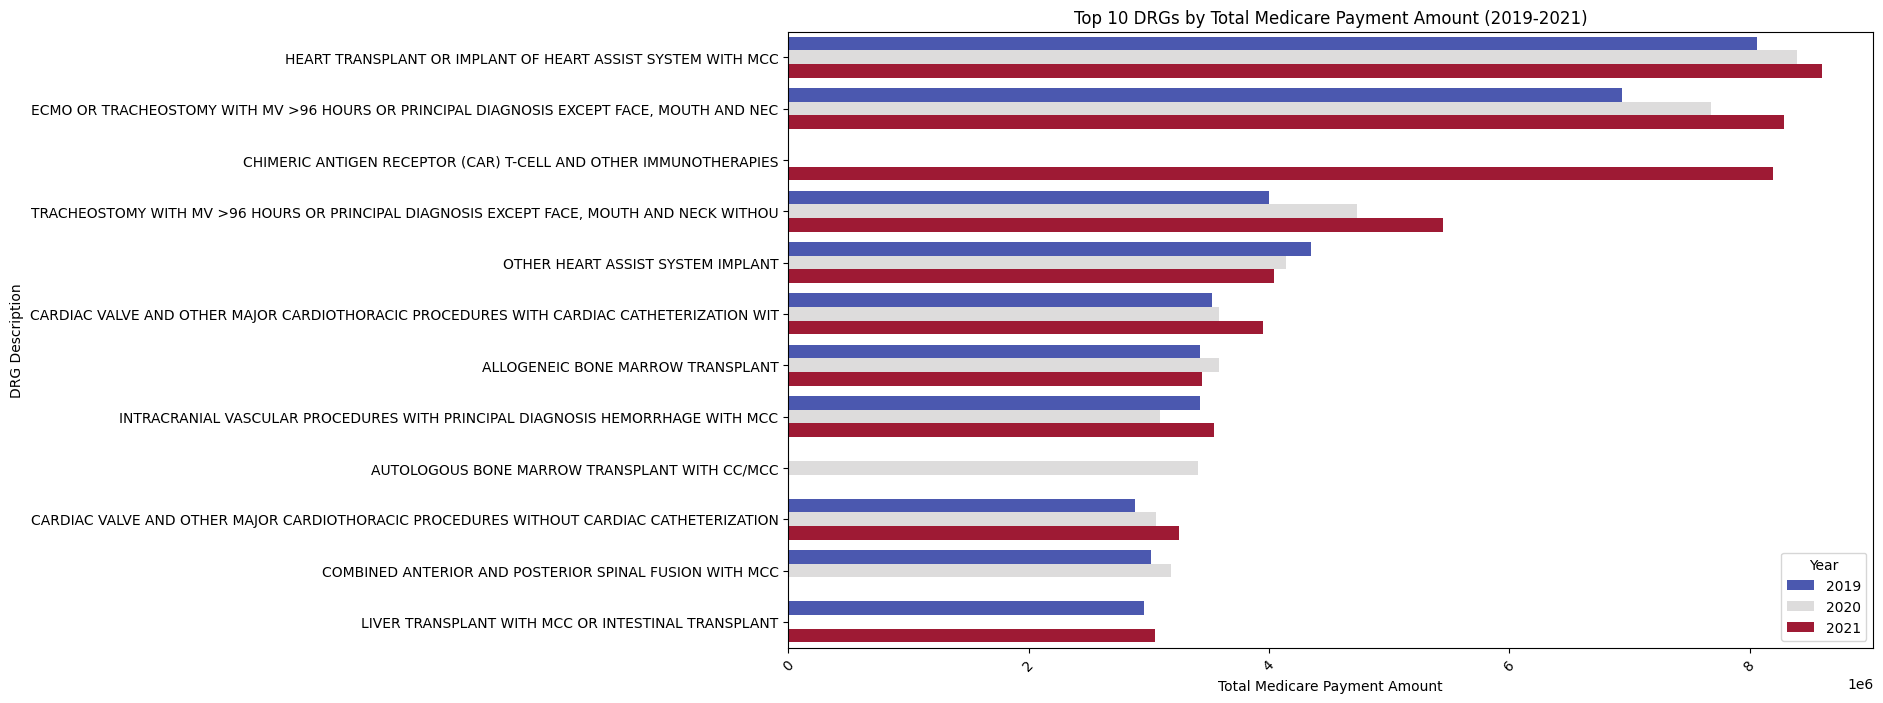

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data for each year
top_drgs_19 = geo_data_19.groupby(['DRG_Cd', 'DRG_Desc'])['Avg_Mdcr_Pymt_Amt'].sum().reset_index()
top_drgs_20 = geo_data_20.groupby(['DRG_Cd', 'DRG_Desc'])['Avg_Mdcr_Pymt_Amt'].sum().reset_index()
top_drgs_21 = geo_data_21.groupby(['DRG_Cd', 'DRG_Desc'])['Avg_Mdcr_Pymt_Amt'].sum().reset_index()

# Add a column for the year
top_drgs_19['Year'] = 2019
top_drgs_20['Year'] = 2020
top_drgs_21['Year'] = 2021

# Concatenate data for all years
top_drgs_combined = pd.concat([top_drgs_19, top_drgs_20, top_drgs_21])

# Filter top 10 DRGs for each year
top_drgs_combined = top_drgs_combined.sort_values(by='Avg_Mdcr_Pymt_Amt', ascending=False).groupby('Year').head(10)

# Plotting the combined data
plt.figure(figsize=(14, 8))
sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='DRG_Desc', hue='Year', data=top_drgs_combined, palette='coolwarm')
plt.title('Top 10 DRGs by Total Medicare Payment Amount (2019-2021)')
plt.xlabel('Total Medicare Payment Amount')
plt.ylabel('DRG Description')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()


<ipython-input-20-a35f747d10a4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_expensive_drgs.values / 1000, y=top_expensive_drgs.index, palette='Spectral')  # Converting to $1000s for easier reading


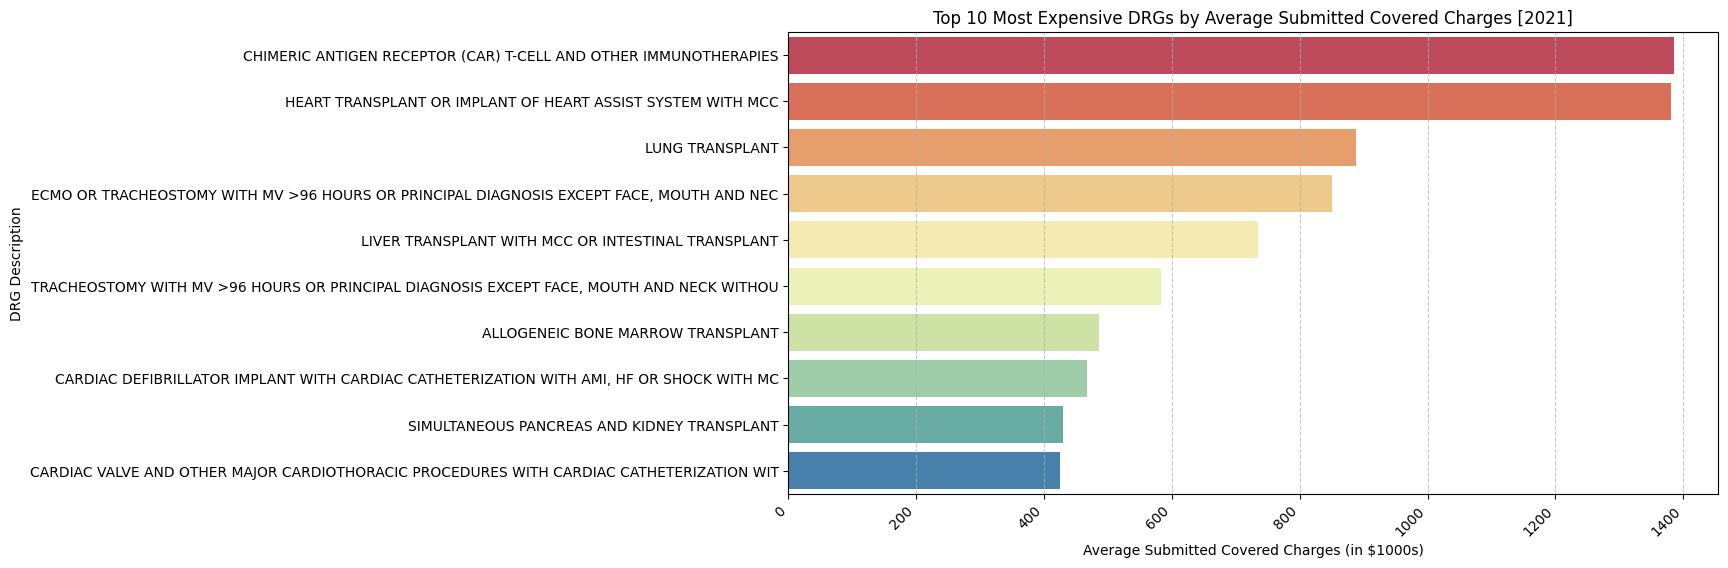

DRG_Desc
CHIMERIC ANTIGEN RECEPTOR (CAR) T-CELL AND OTHER IMMUNOTHERAPIES                            1.385521e+06
HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM WITH MCC                                 1.380203e+06
LUNG TRANSPLANT                                                                             8.886796e+05
ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH AND NEC    8.508749e+05
LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSPLANT                                          7.351425e+05
Name: Avg_Submtd_Cvrd_Chrg, dtype: float64

In [ ]:
# Let's attempt to execute the code provided after reloading and checking data once more.
# Reloading the CSV file to handle possible issues
# ranking top DRGs in provider+service data, moving on from geography+service
#data = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY21_PRVSVC.CSV', encoding='ISO-8859-1')

# Selecting the top 10 most expensive DRGs based on Average Submitted Covered Charges
top_expensive_drgs = prov_data_21.groupby('DRG_Desc')['Avg_Submtd_Cvrd_Chrg'].mean().nlargest(10)

# Creating a bar chart for the top 10 most expensive DRGs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_expensive_drgs.values / 1000, y=top_expensive_drgs.index, palette='Spectral')  # Converting to $1000s for easier reading
plt.title('Top 10 Most Expensive DRGs by Average Submitted Covered Charges [2021]')
plt.xlabel('Average Submitted Covered Charges (in $1000s)')
plt.ylabel('DRG Description')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Output the top expensive DRGs for review
top_expensive_drgs.head()



<ipython-input-19-62edc7969d61>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_expensive_drgs.values / 1000, y=top_expensive_drgs.index, palette='Spectral')  # Converting to $1000s for easier reading


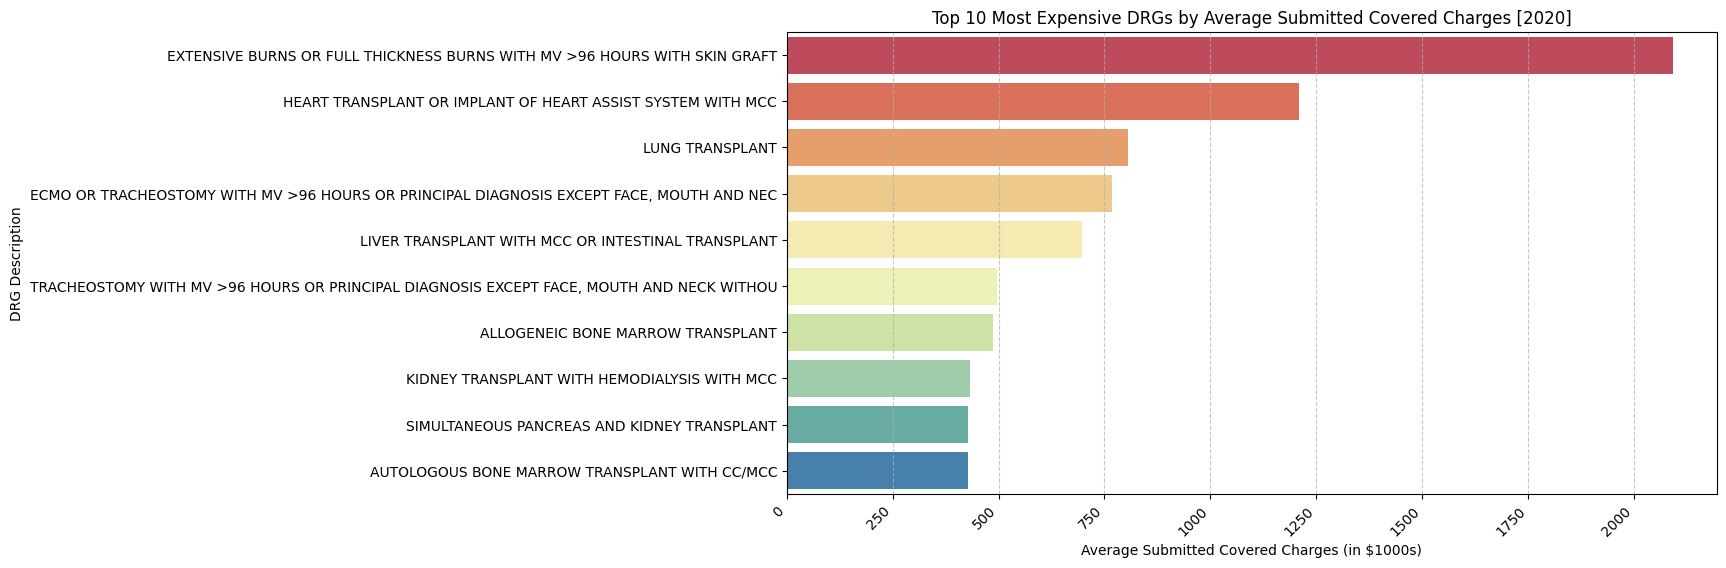

DRG_Desc
EXTENSIVE BURNS OR FULL THICKNESS BURNS WITH MV >96 HOURS WITH SKIN GRAFT                   2.091633e+06
HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM WITH MCC                                 1.208855e+06
LUNG TRANSPLANT                                                                             8.043673e+05
ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH AND NEC    7.668906e+05
LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSPLANT                                          6.964245e+05
Name: Avg_Submtd_Cvrd_Chrg, dtype: float64

In [ ]:
# Selecting the top 10 most expensive DRGs based on Average Submitted Covered Charges
top_expensive_drgs = prov_data_20.groupby('DRG_Desc')['Avg_Submtd_Cvrd_Chrg'].mean().nlargest(10)

# Creating a bar chart for the top 10 most expensive DRGs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_expensive_drgs.values / 1000, y=top_expensive_drgs.index, palette='Spectral')  # Converting to $1000s for easier reading
plt.title('Top 10 Most Expensive DRGs by Average Submitted Covered Charges [2020]')
plt.xlabel('Average Submitted Covered Charges (in $1000s)')
plt.ylabel('DRG Description')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Output the top expensive DRGs for review
top_expensive_drgs.head()

<ipython-input-22-f12e7848fd19>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_expensive_drgs.values / 1000, y=top_expensive_drgs.index, palette='Spectral')  # Converting to $1000s for easier reading


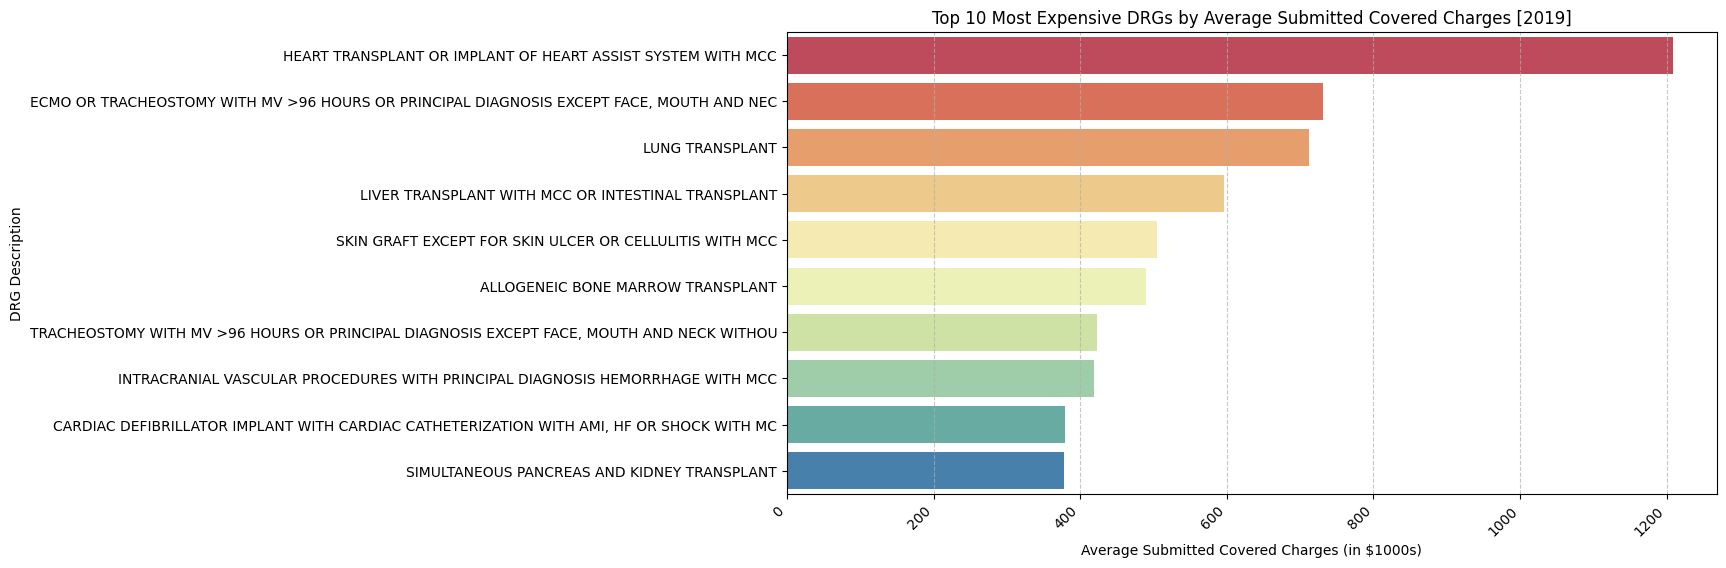

DRG_Desc
HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM WITH MCC                                 1.208186e+06
ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH AND NEC    7.310803e+05
LUNG TRANSPLANT                                                                             7.124053e+05
LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSPLANT                                          5.967444e+05
SKIN GRAFT EXCEPT FOR SKIN ULCER OR CELLULITIS WITH MCC                                     5.051426e+05
Name: Avg_Submtd_Cvrd_Chrg, dtype: float64

In [ ]:
# Selecting the top 10 most expensive DRGs based on Average Submitted Covered Charges
top_expensive_drgs = prov_data_19.groupby('DRG_Desc')['Avg_Submtd_Cvrd_Chrg'].mean().nlargest(10)

# Creating a bar chart for the top 10 most expensive DRGs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_expensive_drgs.values / 1000, y=top_expensive_drgs.index, palette='Spectral')  # Converting to $1000s for easier reading
plt.title('Top 10 Most Expensive DRGs by Average Submitted Covered Charges [2019]')
plt.xlabel('Average Submitted Covered Charges (in $1000s)')
plt.ylabel('DRG Description')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Output the top expensive DRGs for review
top_expensive_drgs.head()

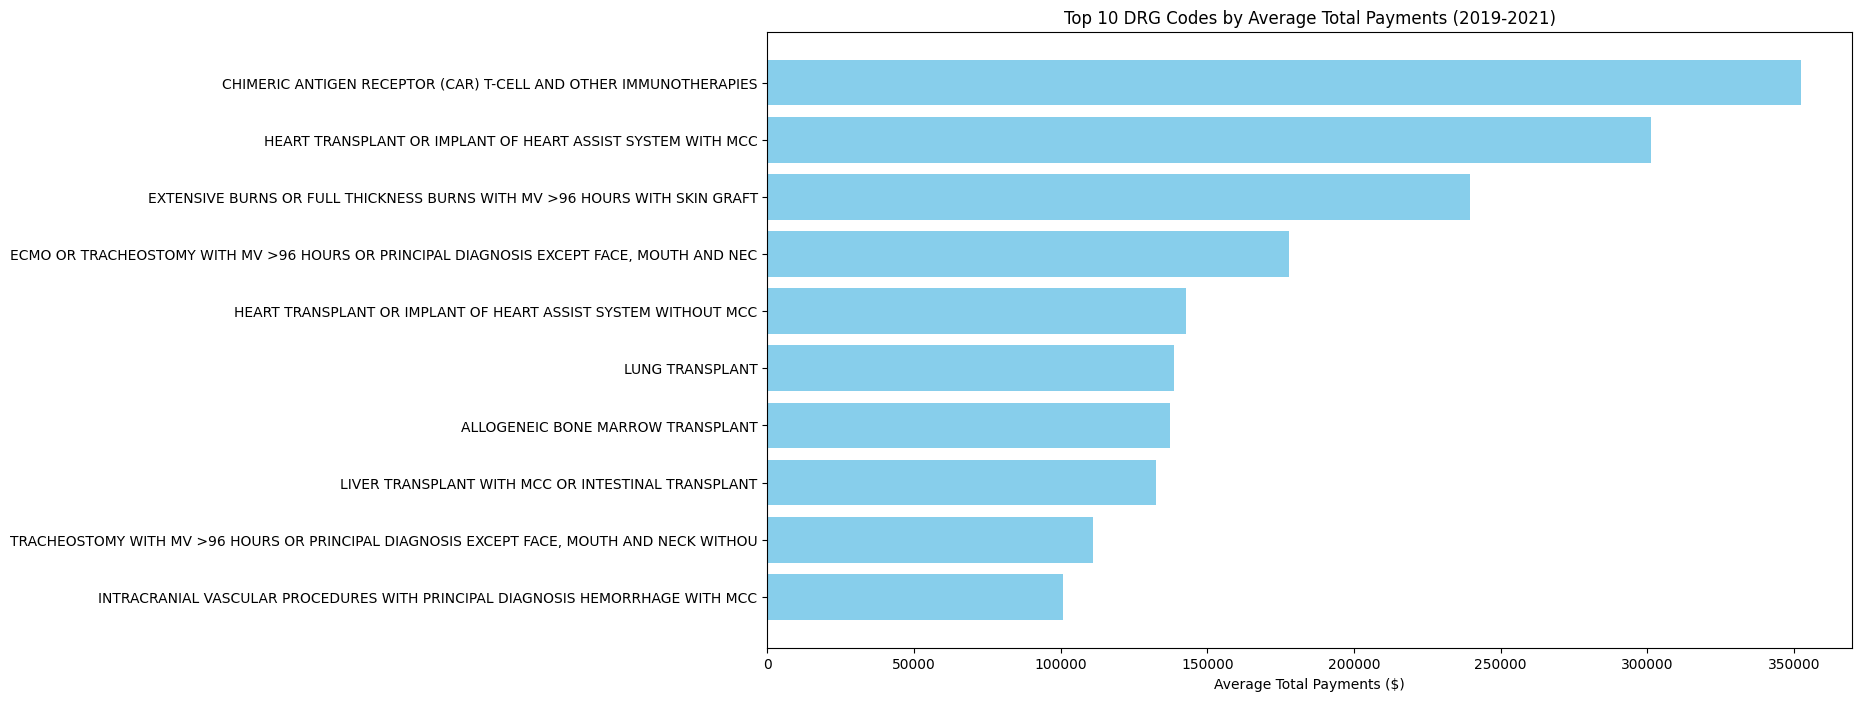

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define key columns for analysis
key_columns = ['DRG_Cd', 'DRG_Desc', 'Tot_Dschrgs', 'Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt']

# Select key columns from each dataset
geo_data_21_selected = geo_data_21[key_columns]
prov_data_21_selected = prov_data_21[key_columns]
geo_data_19_selected = geo_data_19[key_columns]
prov_data_19_selected = prov_data_19[key_columns]
geo_data_20_selected = geo_data_20[key_columns]
prov_data_20_selected = prov_data_20[key_columns]

# Combine datasets for a comprehensive analysis
combined_data = pd.concat([
    geo_data_21_selected.assign(year=2021),
    prov_data_21_selected.assign(year=2021),
    geo_data_19_selected.assign(year=2019),
    prov_data_19_selected.assign(year=2019),
    geo_data_20_selected.assign(year=2020),
    prov_data_20_selected.assign(year=2020)
])

# Calculate the average charges and payments for each DRG code across all years
avg_charges_payments = combined_data.groupby('DRG_Cd').agg({
    'Avg_Submtd_Cvrd_Chrg': 'mean',
    'Avg_Tot_Pymt_Amt': 'mean',
    'Avg_Mdcr_Pymt_Amt': 'mean'
}).reset_index()

# Merge with DRG descriptions
drg_descriptions = combined_data[['DRG_Cd', 'DRG_Desc']].drop_duplicates()
avg_charges_payments = avg_charges_payments.merge(drg_descriptions, on='DRG_Cd')

# Sort by average total payments
avg_charges_payments = avg_charges_payments.sort_values(by='Avg_Tot_Pymt_Amt', ascending=False)

# Display the top 10 DRG codes with the highest average total payments
top_10_drg = avg_charges_payments.head(10)

# Plot the top 10 DRG codes with the highest average total payments
plt.figure(figsize=(14, 8))
plt.barh(top_10_drg['DRG_Desc'], top_10_drg['Avg_Tot_Pymt_Amt'], color='skyblue')
plt.xlabel('Average Total Payments ($)')
plt.title('Top 10 DRG Codes by Average Total Payments (2019-2021)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Combine data from all years for analysis
all_geo_data = pd.concat([geo_data_21.assign(year=2021), geo_data_20.assign(year=2020), geo_data_19.assign(year=2019)])

# Group by DRG and calculate average and total costs
drg_costs = all_geo_data.groupby('DRG_Desc').agg({
    'Avg_Submtd_Cvrd_Chrg': 'mean',
    'Avg_Tot_Pymt_Amt': 'mean',
    'Avg_Mdcr_Pymt_Amt': 'mean',
    'Tot_Dschrgs': 'sum'
}).reset_index()

# Calculate total costs
drg_costs['total_submtd_cvrd_chrg'] = drg_costs['Avg_Submtd_Cvrd_Chrg'] * drg_costs['Tot_Dschrgs']
drg_costs['total_tot_pymt_amt'] = drg_costs['Avg_Tot_Pymt_Amt'] * drg_costs['Tot_Dschrgs']
drg_costs['total_mdcr_pymt_amt'] = drg_costs['Avg_Mdcr_Pymt_Amt'] * drg_costs['Tot_Dschrgs']

# Sort by total costs
drg_costs_sorted = drg_costs.sort_values(by='total_tot_pymt_amt', ascending=False)

top_10_drg_costs = drg_costs_sorted.head(10)
print(top_10_drg_costs)


                                              DRG_Desc  Avg_Submtd_Cvrd_Chrg  \
627  SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...          62059.722212   
606  RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC          55672.786623   
364  MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTA...          62611.094198   
245                   HEART FAILURE AND SHOCK WITH MCC          42441.152538   
276  INFECTIOUS AND PARASITIC DISEASES WITH O.R. PR...         159926.011494   
200  ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...         663960.211497   
626      SEPTICEMIA OR SEVERE SEPSIS WITH MV >96 HOURS         230378.577993   
613  RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR S...         221797.794555   
688  TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...         425809.162133   
205  ENDOVASCULAR CARDIAC VALVE REPLACEMENT AND SUP...         172823.442029   

     Avg_Tot_Pymt_Amt  Avg_Mdcr_Pymt_Amt  Tot_Dschrgs  total_submtd_cvrd_chrg  \
627      15573.845511       13384.6353

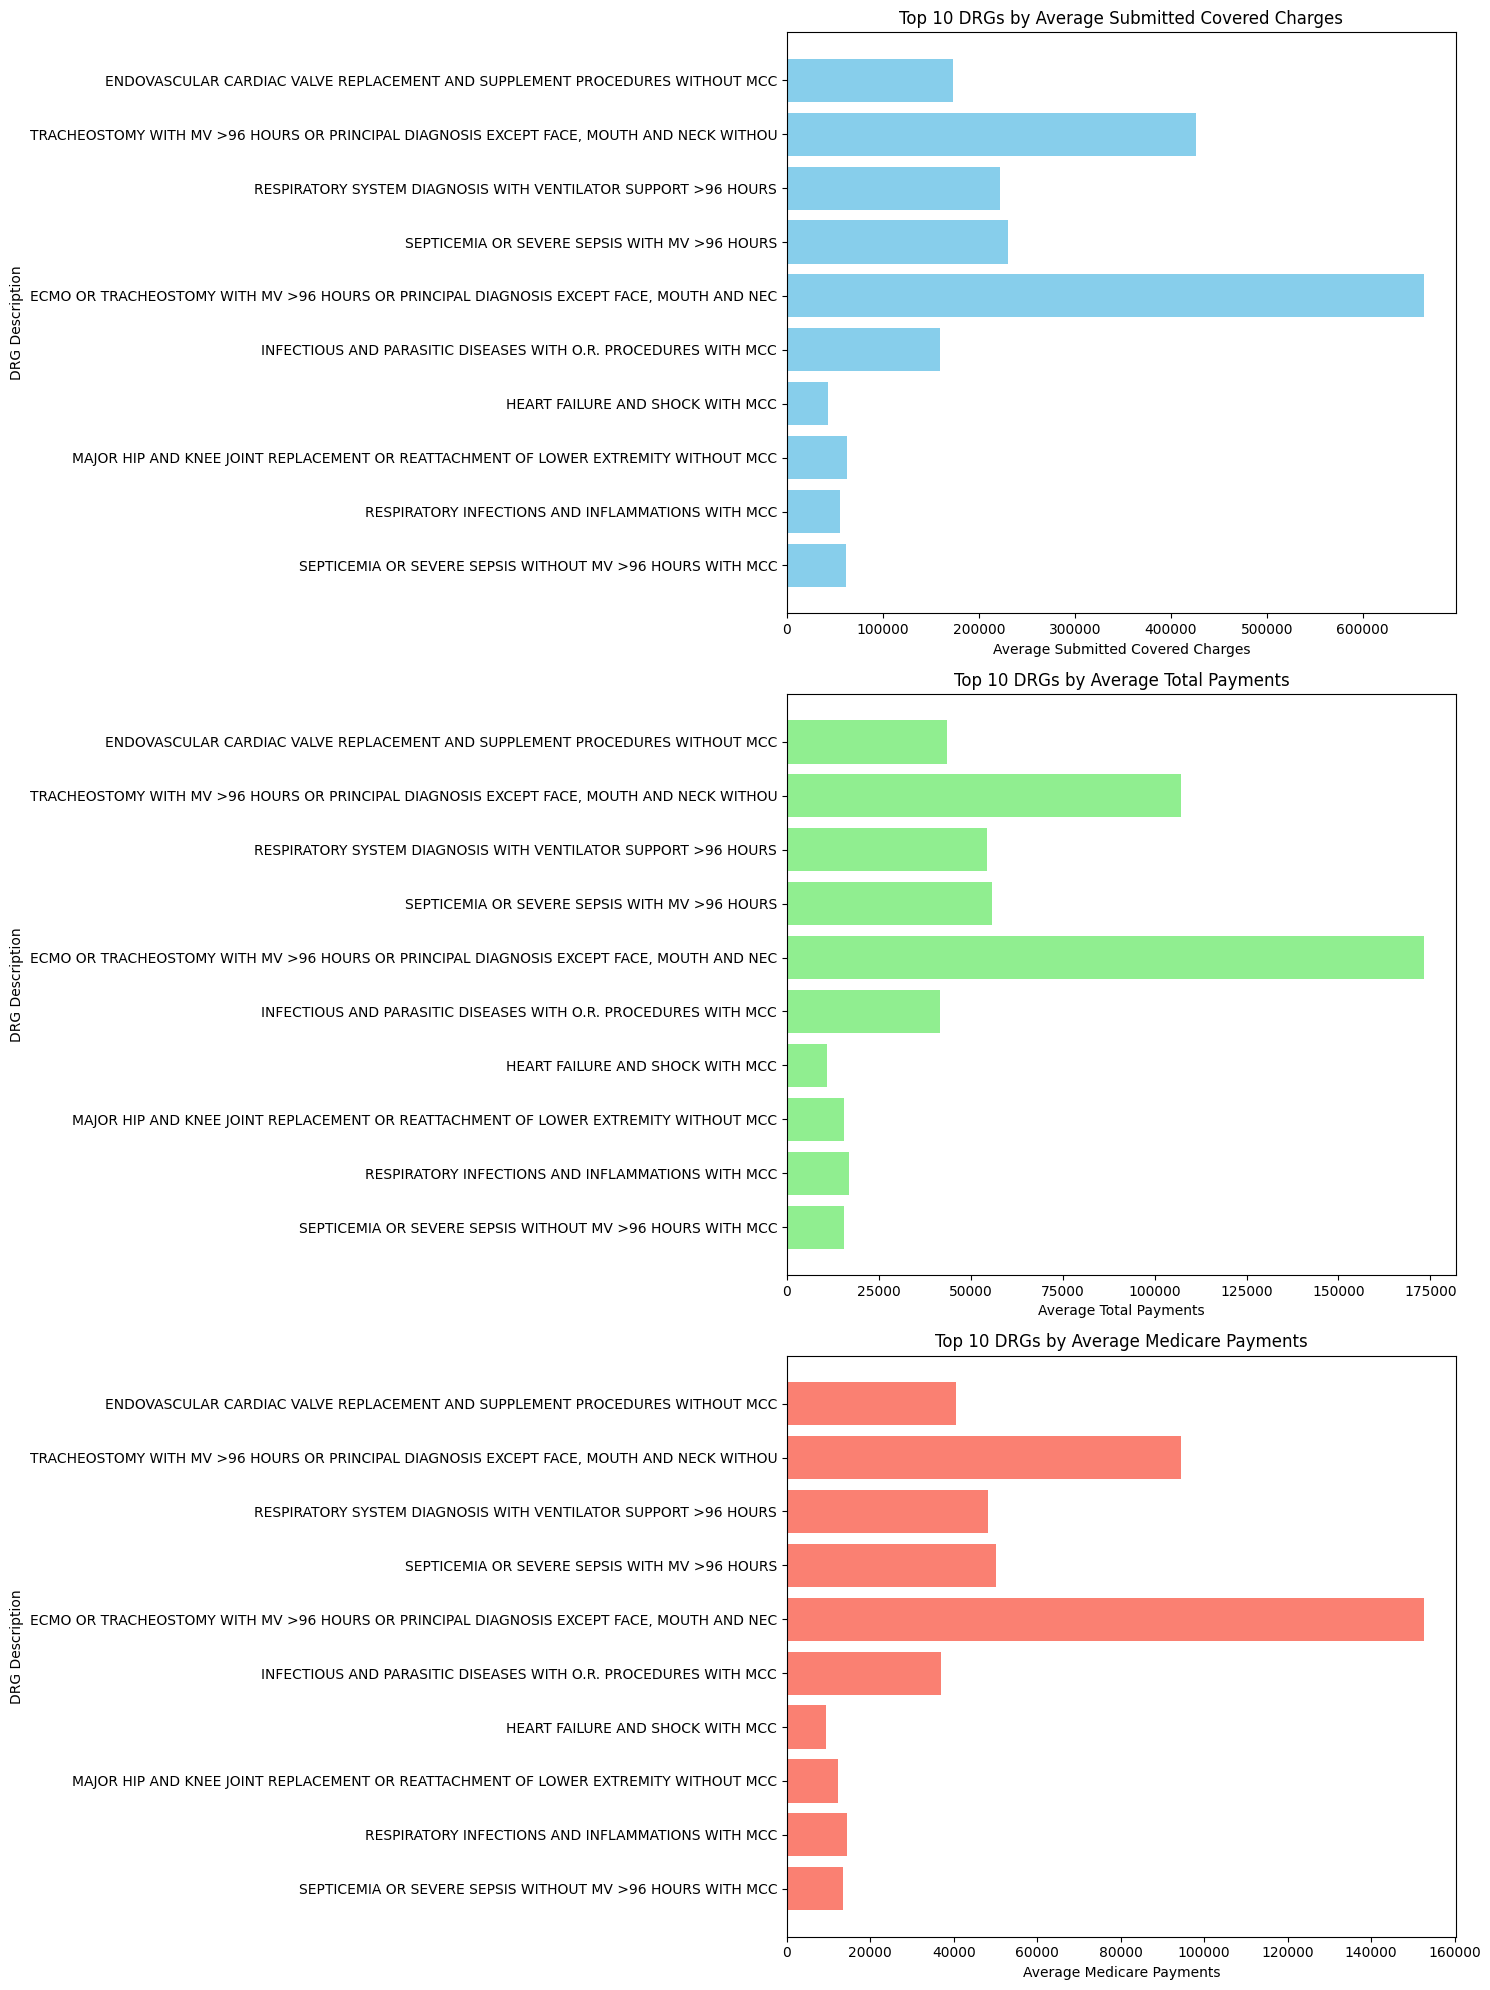

In [ ]:
import matplotlib.pyplot as plt

# Define a function to visualize the top 10 most expensive DRGs
def visualize_top_drg_costs(drg_costs):
    # Set up the figure and axes
    fig, ax = plt.subplots(3, 1, figsize=(15, 20))

    # Plot Average Submitted Covered Charges
    ax[0].barh(drg_costs['DRG_Desc'], drg_costs['Avg_Submtd_Cvrd_Chrg'], color='skyblue')
    ax[0].set_title('Top 10 DRGs by Average Submitted Covered Charges')
    ax[0].set_xlabel('Average Submitted Covered Charges')
    ax[0].set_ylabel('DRG Description')

    # Plot Average Total Payments
    ax[1].barh(drg_costs['DRG_Desc'], drg_costs['Avg_Tot_Pymt_Amt'], color='lightgreen')
    ax[1].set_title('Top 10 DRGs by Average Total Payments')
    ax[1].set_xlabel('Average Total Payments')
    ax[1].set_ylabel('DRG Description')

    # Plot Average Medicare Payments
    ax[2].barh(drg_costs['DRG_Desc'], drg_costs['Avg_Mdcr_Pymt_Amt'], color='salmon')
    ax[2].set_title('Top 10 DRGs by Average Medicare Payments')
    ax[2].set_xlabel('Average Medicare Payments')
    ax[2].set_ylabel('DRG Description')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Visualize the top 10 most expensive DRGs
visualize_top_drg_costs(top_10_drg_costs)


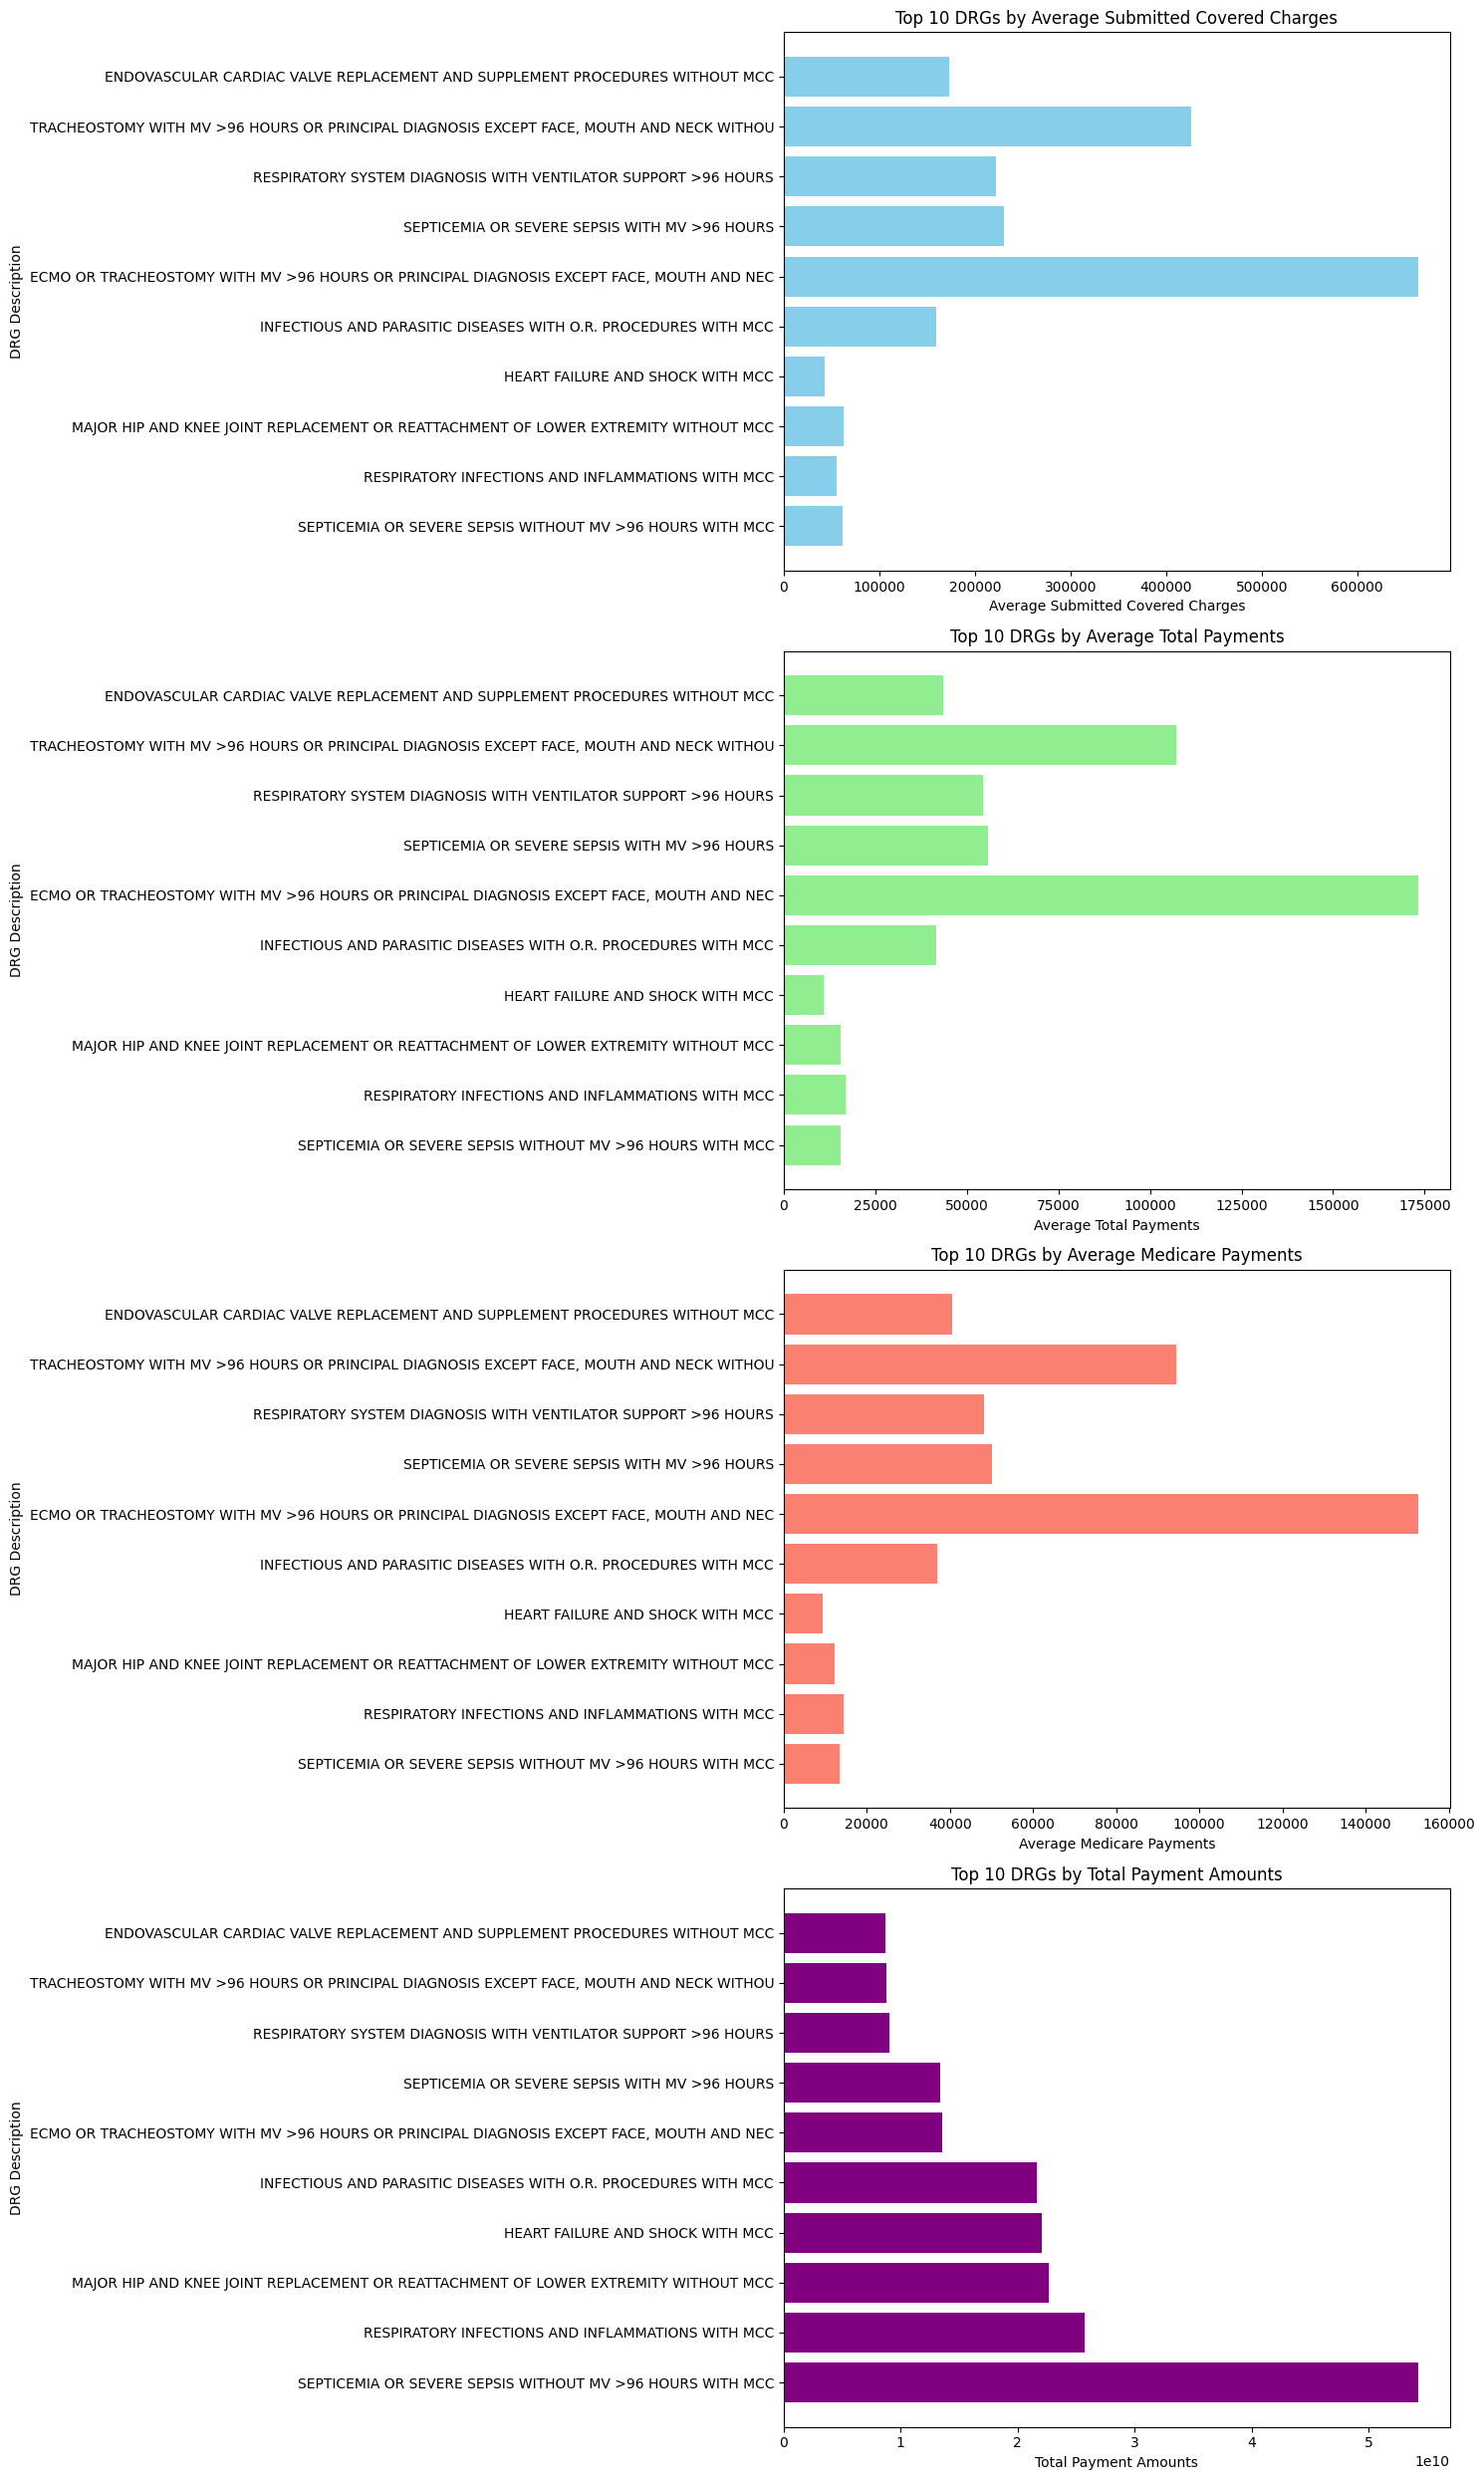

In [ ]:
drg_costs = all_geo_data.groupby('DRG_Desc').agg({
    'Avg_Submtd_Cvrd_Chrg': 'mean',
    'Avg_Tot_Pymt_Amt': 'mean',
    'Avg_Mdcr_Pymt_Amt': 'mean',
    'Tot_Dschrgs': 'sum'
}).reset_index()

drg_costs['Total_Submtd_Cvrd_Chrg'] = drg_costs['Avg_Submtd_Cvrd_Chrg'] * drg_costs['Tot_Dschrgs']
drg_costs['Total_Tot_Pymt_Amt'] = drg_costs['Avg_Tot_Pymt_Amt'] * drg_costs['Tot_Dschrgs']
drg_costs['Total_Mdcr_Pymt_Amt'] = drg_costs['Avg_Mdcr_Pymt_Amt'] * drg_costs['Tot_Dschrgs']

drg_costs_sorted = drg_costs.sort_values(by='Total_Tot_Pymt_Amt', ascending=False)
top_10_drg_costs = drg_costs_sorted.head(10)

# Define a function to visualize the top 10 most expensive DRGs including total payment amounts
def visualize_top_drg_costs_with_totals(drg_costs):
    # Set up the figure and axes
    fig, ax = plt.subplots(4, 1, figsize=(15, 25))

    # Plot Average Submitted Covered Charges
    ax[0].barh(drg_costs['DRG_Desc'], drg_costs['Avg_Submtd_Cvrd_Chrg'], color='skyblue')
    ax[0].set_title('Top 10 DRGs by Average Submitted Covered Charges')
    ax[0].set_xlabel('Average Submitted Covered Charges')
    ax[0].set_ylabel('DRG Description')

    # Plot Average Total Payments
    ax[1].barh(drg_costs['DRG_Desc'], drg_costs['Avg_Tot_Pymt_Amt'], color='lightgreen')
    ax[1].set_title('Top 10 DRGs by Average Total Payments')
    ax[1].set_xlabel('Average Total Payments')
    ax[1].set_ylabel('DRG Description')

    # Plot Average Medicare Payments
    ax[2].barh(drg_costs['DRG_Desc'], drg_costs['Avg_Mdcr_Pymt_Amt'], color='salmon')
    ax[2].set_title('Top 10 DRGs by Average Medicare Payments')
    ax[2].set_xlabel('Average Medicare Payments')
    ax[2].set_ylabel('DRG Description')

    # Plot Total Payment Amounts
    ax[3].barh(drg_costs['DRG_Desc'], drg_costs['Total_Tot_Pymt_Amt'], color='purple')
    ax[3].set_title('Top 10 DRGs by Total Payment Amounts')
    ax[3].set_xlabel('Total Payment Amounts')
    ax[3].set_ylabel('DRG Description')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Visualize the top 10 most expensive DRGs with total payment amounts
visualize_top_drg_costs_with_totals(top_10_drg_costs)


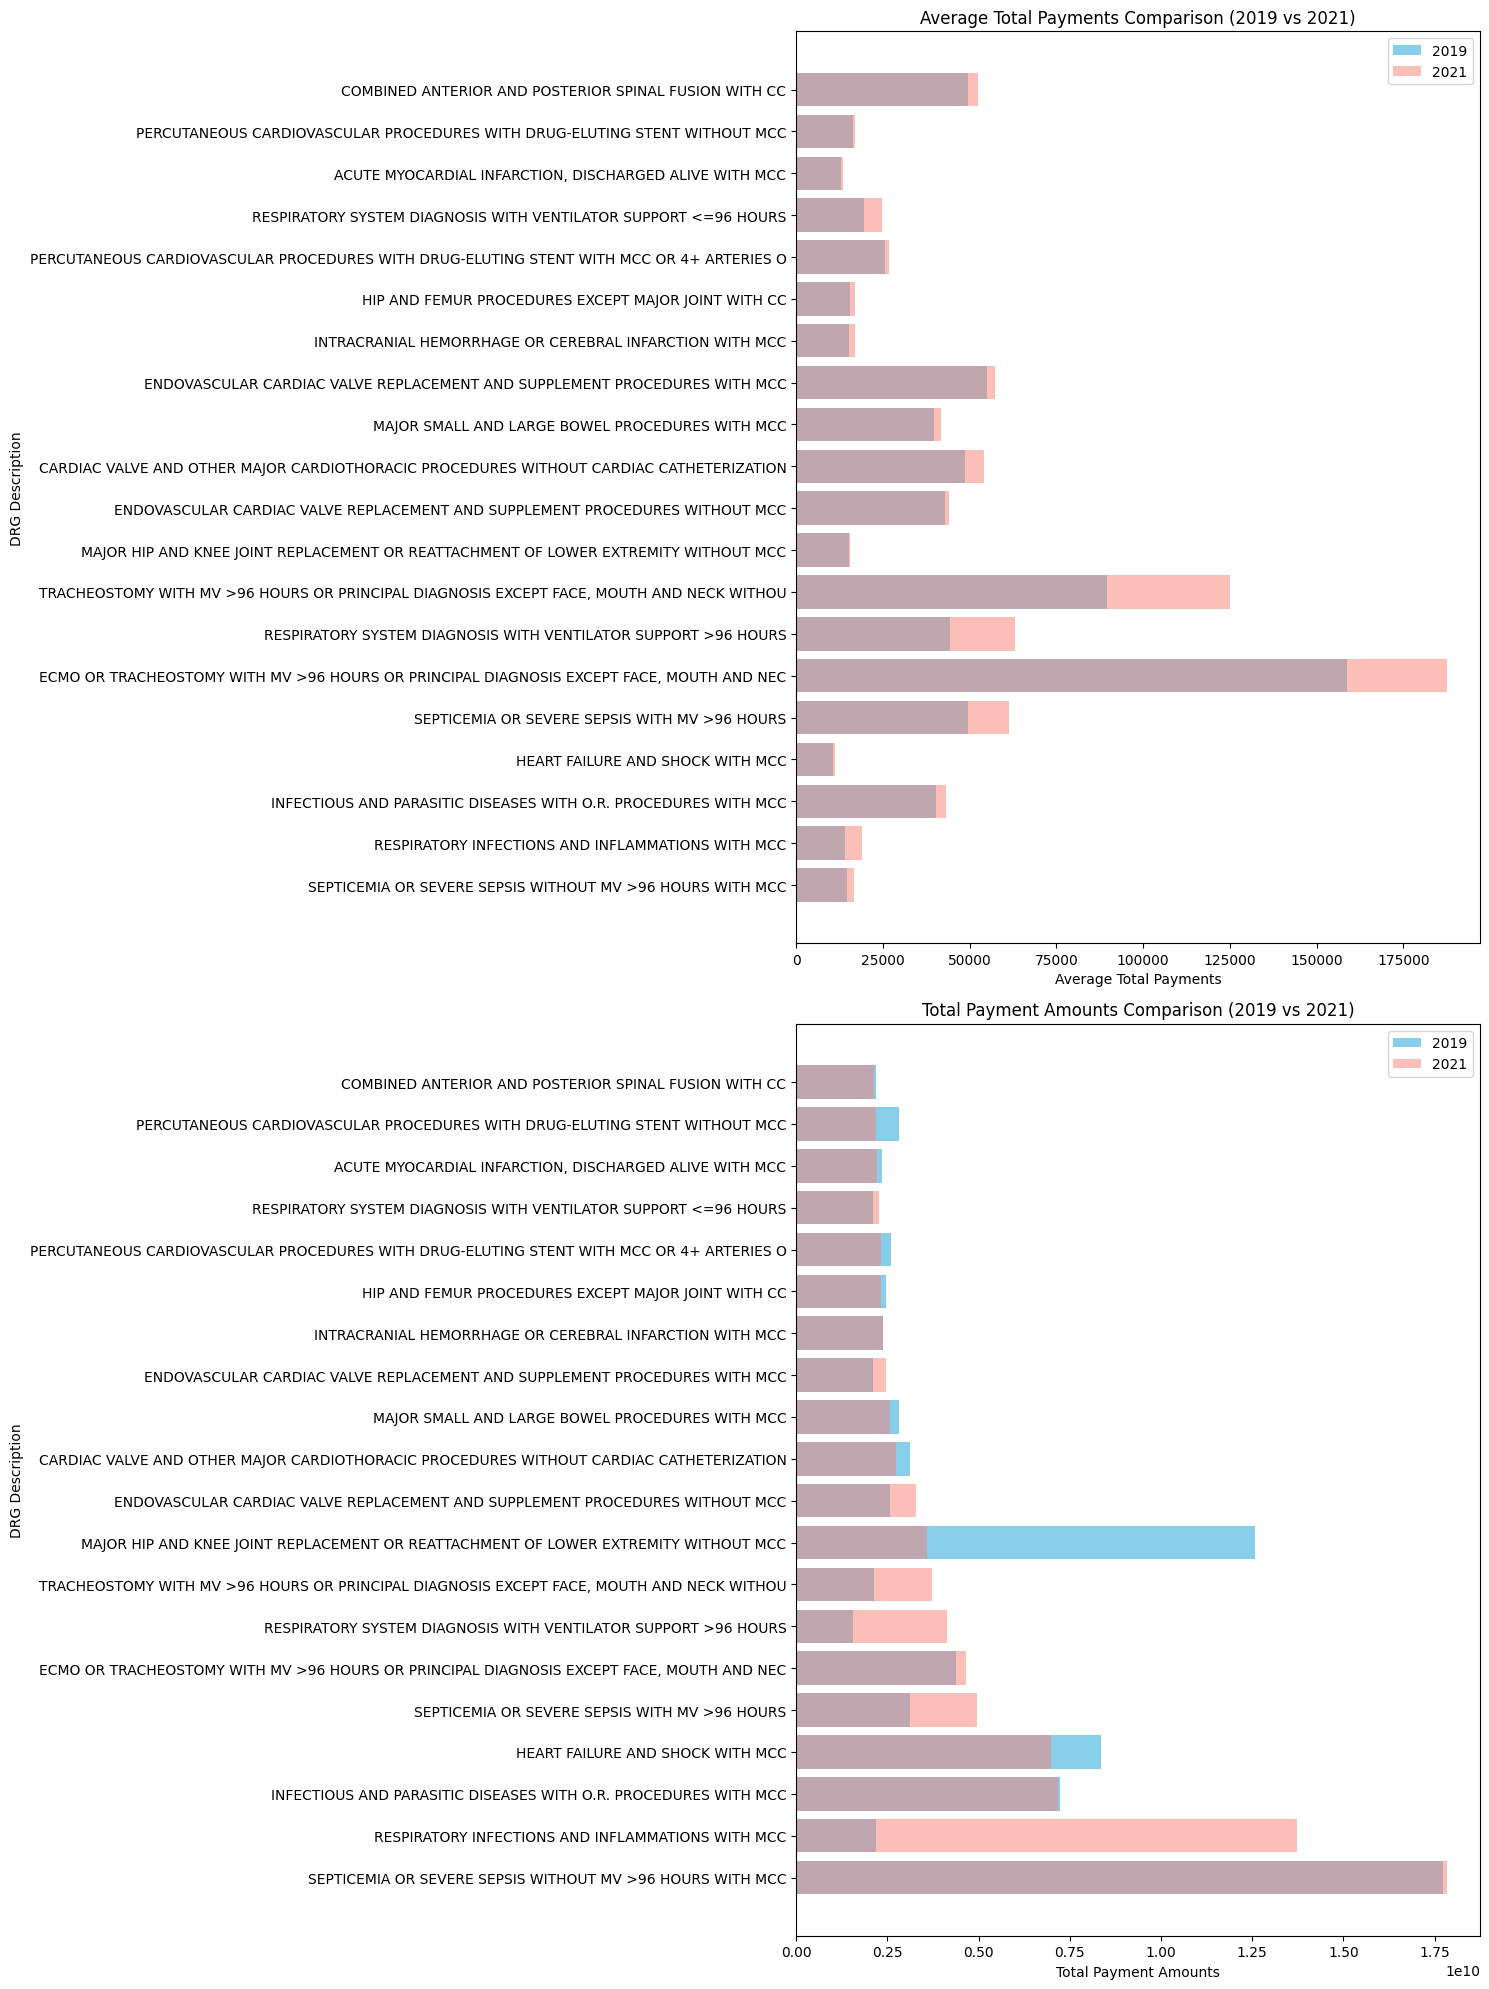

In [ ]:
import pandas as pd

# Assuming you have already loaded the data and calculated the required metrics as shown before
drg_yearly_costs = all_geo_data.groupby(['DRG_Desc', 'year']).agg({
    'Avg_Tot_Pymt_Amt': 'mean',
    'Tot_Dschrgs': 'sum'
}).reset_index()

drg_yearly_costs['Total_Tot_Pymt_Amt'] = drg_yearly_costs['Avg_Tot_Pymt_Amt'] * drg_yearly_costs['Tot_Dschrgs']

drg_2019 = drg_yearly_costs[drg_yearly_costs['year'] == 2019]
drg_2020 = drg_yearly_costs[drg_yearly_costs['year'] == 2020]
drg_2021 = drg_yearly_costs[drg_yearly_costs['year'] == 2021]

drg_compare = pd.merge(drg_2019, drg_2021, on='DRG_Desc', suffixes=('_2019', '_2021'))
drg_compare = drg_compare[['DRG_Desc', 'Avg_Tot_Pymt_Amt_2019', 'Avg_Tot_Pymt_Amt_2021', 'Total_Tot_Pymt_Amt_2019', 'Total_Tot_Pymt_Amt_2021']]

# Focus on top 20 DRGs by total payment amounts in 2021
top_20_drg_compare = drg_compare.nlargest(20, 'Total_Tot_Pymt_Amt_2021')

import matplotlib.pyplot as plt

def visualize_top_20_drg_comparison(drg_compare):
    fig, ax = plt.subplots(2, 1, figsize=(15, 20))

    # Plot Average Total Payments
    ax[0].barh(drg_compare['DRG_Desc'], drg_compare['Avg_Tot_Pymt_Amt_2019'], color='skyblue', label='2019')
    ax[0].barh(drg_compare['DRG_Desc'], drg_compare['Avg_Tot_Pymt_Amt_2021'], color='salmon', alpha=0.5, label='2021')
    ax[0].set_title('Average Total Payments Comparison (2019 vs 2021)')
    ax[0].set_xlabel('Average Total Payments')
    ax[0].set_ylabel('DRG Description')
    ax[0].legend()

    # Plot Total Payment Amounts
    ax[1].barh(drg_compare['DRG_Desc'], drg_compare['Total_Tot_Pymt_Amt_2019'], color='skyblue', label='2019')
    ax[1].barh(drg_compare['DRG_Desc'], drg_compare['Total_Tot_Pymt_Amt_2021'], color='salmon', alpha=0.5, label='2021')
    ax[1].set_title('Total Payment Amounts Comparison (2019 vs 2021)')
    ax[1].set_xlabel('Total Payment Amounts')
    ax[1].set_ylabel('DRG Description')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

visualize_top_20_drg_comparison(top_20_drg_compare)



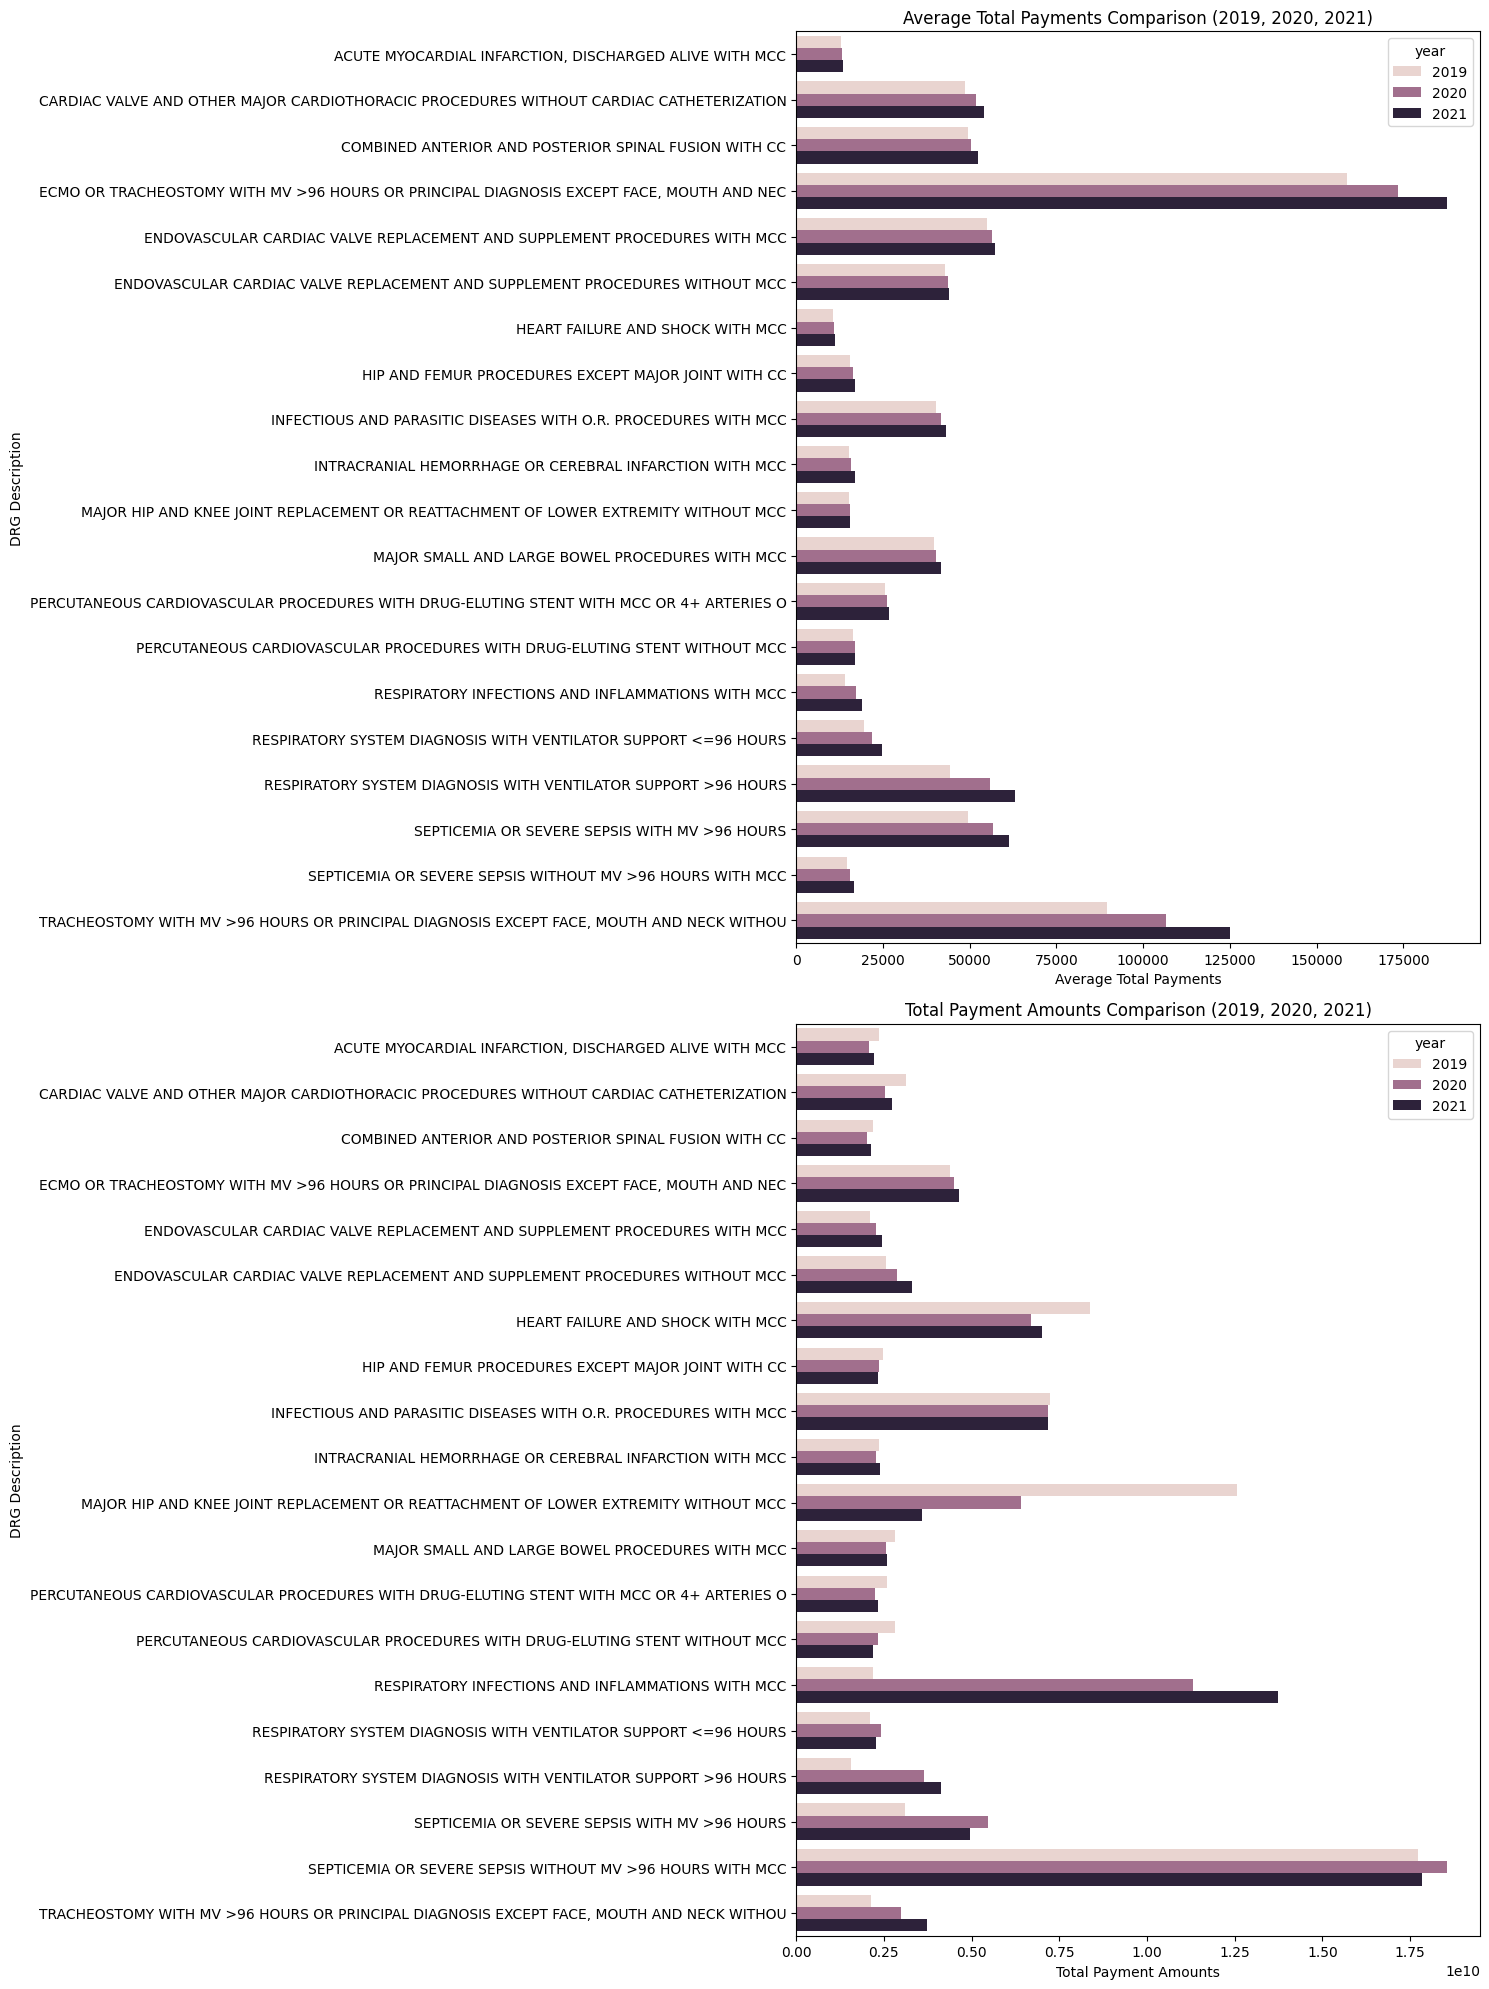

In [ ]:
# Function to prepare data for visualization for all three years
def prepare_data_for_visualization(data):
    # Group by DRG and year, then calculate total and average payment amounts
    drg_yearly_costs = data.groupby(['DRG_Desc', 'year']).agg({
        'Avg_Tot_Pymt_Amt': 'mean',
        'Tot_Dschrgs': 'sum'
    }).reset_index()

    # Calculate total payment amounts
    drg_yearly_costs['Total_Tot_Pymt_Amt'] = drg_yearly_costs['Avg_Tot_Pymt_Amt'] * drg_yearly_costs['Tot_Dschrgs']

    return drg_yearly_costs

# Prepare data
drg_yearly_costs = prepare_data_for_visualization(all_geo_data)

# Focus on top 20 DRGs by total payment amounts in 2021
top_20_drgs = drg_yearly_costs[drg_yearly_costs['year'] == 2021].nlargest(20, 'Total_Tot_Pymt_Amt')['DRG_Desc']

# Filter data for only top 20 DRGs
top_20_drg_costs = drg_yearly_costs[drg_yearly_costs['DRG_Desc'].isin(top_20_drgs)]

# Visualize all three years together
def visualize_top_20_drg_comparison_all_years(drg_costs):
    fig, ax = plt.subplots(2, 1, figsize=(15, 20))

    # Plot Average Total Payments
    sns.barplot(x='Avg_Tot_Pymt_Amt', y='DRG_Desc', hue='year', data=drg_costs, ax=ax[0])
    ax[0].set_title('Average Total Payments Comparison (2019, 2020, 2021)')
    ax[0].set_xlabel('Average Total Payments')
    ax[0].set_ylabel('DRG Description')

    # Plot Total Payment Amounts
    sns.barplot(x='Total_Tot_Pymt_Amt', y='DRG_Desc', hue='year', data=drg_costs, ax=ax[1])
    ax[1].set_title('Total Payment Amounts Comparison (2019, 2020, 2021)')
    ax[1].set_xlabel('Total Payment Amounts')
    ax[1].set_ylabel('DRG Description')

    plt.tight_layout()
    plt.show()

# Visualize the data
visualize_top_20_drg_comparison_all_years(top_20_drg_costs)
